# CNN Model to find whether given image is cat or dog

In [ ]:
#importing reuired libraries

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

In [6]:
#2000 training,1000validation,1000testing

In [7]:
train_dr=r'C:\Users\vittal\Documents\cats_and_dogs_small\train'
test_dr=r'C:\Users\vittal\Documents\cats_and_dogs_small\test'
valid_dr =r'C:\Users\vittal\Documents\cats_and_dogs_small\validation'

## Data processing
i)Read the pictures<br>
ii)decode the jpeg to rbg pixels<br>
iii)convert these into floating point tensors<br>
iv)rescale the pixel values in the range[0,1]

In [8]:
#generating batches of tensor image date

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)

train_generator=train_datagen.flow_from_directory(train_dr,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(valid_dr,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

### Model creation

In [76]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
          
model.add(layers.Dense(512,activation = 'relu'))
          
model.add(layers.Dense(1,activation = 'sigmoid'))

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

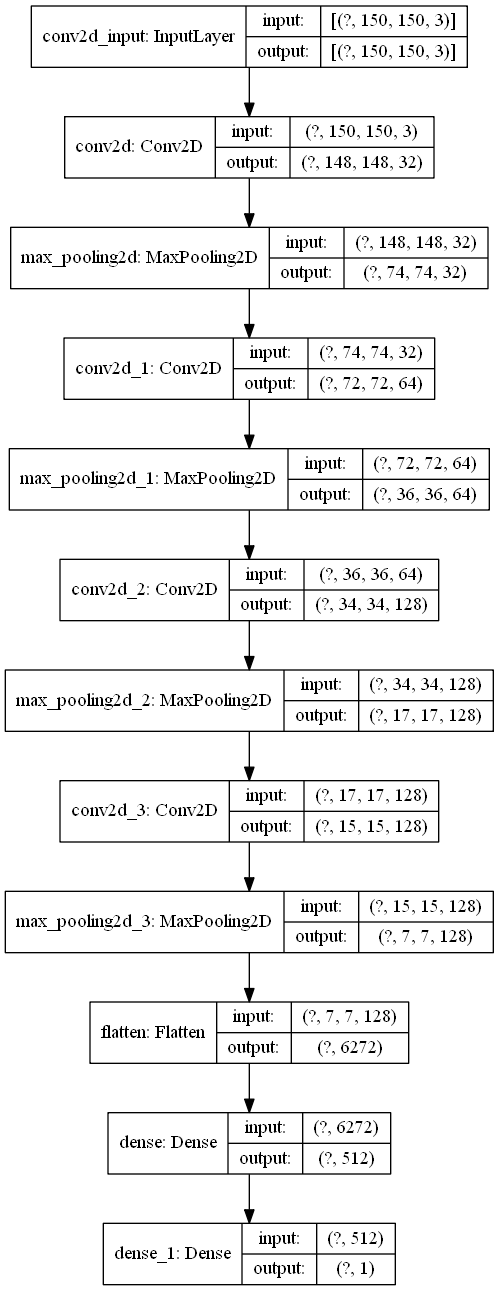

In [78]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [22]:
#optimisers
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [23]:
#fitting the model
history  = model.fit_generator(train_generator,
                               steps_per_epoch = 100,
                               epochs = 20,
                               validation_data =validation_generator,
                               validation_steps = 50 )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 42s 424ms/step - loss: 0.6880 - acc: 0.5380 - val_loss: 0.6729 - val_acc: 0.5480
Epoch 2/20
100/100 [==============================] - 38s 381ms/step - loss: 0.6521 - acc: 0.6320 - val_loss: 0.6500 - val_acc: 0.5870
Epoch 3/20
100/100 [==============================] - 39s 395ms/step - loss: 0.5987 - acc: 0.6805 - val_loss: 0.6433 - val_acc: 0.6360
Epoch 4/20
100/100 [==============================] - 40s 399ms/step - loss: 0.5621 - acc: 0.7090 - val_loss: 0.5875 - val_acc: 0.6880
Epoch 5/20
100/100 [==============================] - 40s 404ms/step - loss: 0.5320 - acc: 0.7330 - val_loss: 0.5822 - val_acc: 0.6830
Epoch 6/20
100/100 [==============================] - 47s 474ms/step - loss: 0.5077 - acc: 0.7465 - val_loss: 0.5857 - val_acc: 0.7000
Epoch 7/20
100/100 [=

<function matplotlib.pyplot.show(close=None, block=None)>

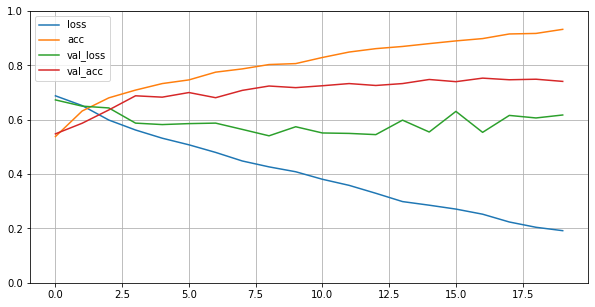

In [24]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [25]:
model.save("model_basic.h5")

In [27]:
from tensorflow.keras import backend as K

K.clear_session()
del model

##### We can see the validation accuracy is very low (74%) as compared to that of train set accuracy(94%)  which shows that model is overfitting the data hence we opt to do some data augmentation so that the problem of overfitting can be overcome

### Model with Data Augmentation

In [86]:
#applying sheer ,rotation,width_shift_height_shift,zoom to the input data

In [60]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 30,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dr,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(valid_dr,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [79]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))                                #we add an extra layer of dropout
          
model.add(layers.Dense(512,activation = 'relu'))
          
model.add(layers.Dense(1,activation = 'sigmoid'))

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

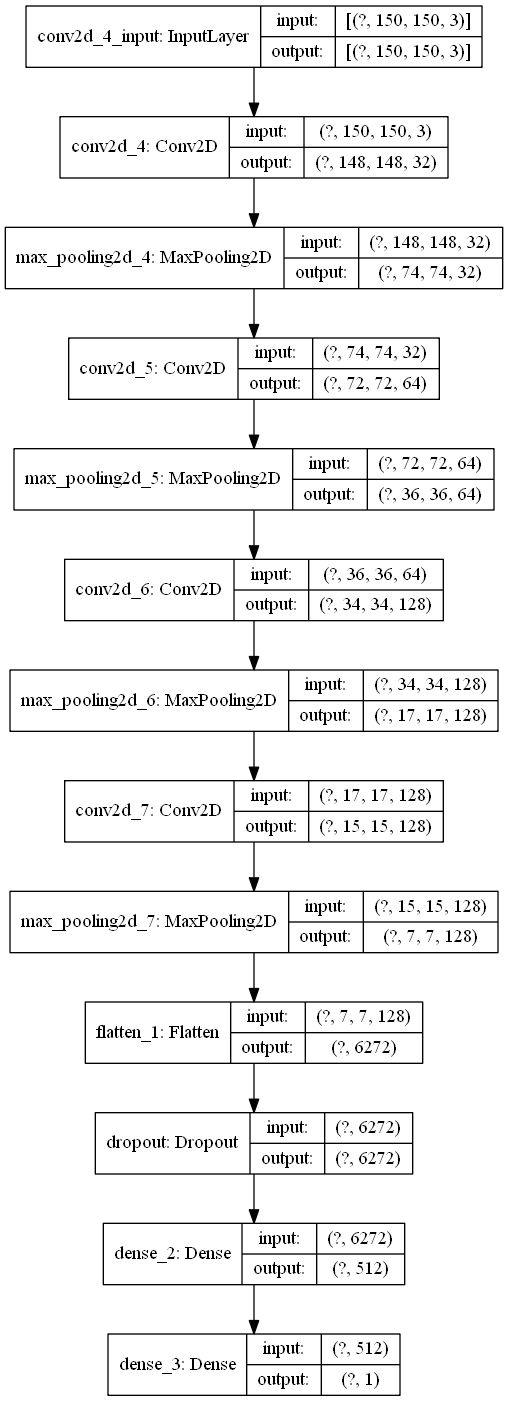

In [81]:
#plot of the model
dot_img_file = 'model_data_aug.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [43]:
model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [44]:
history  = model.fit_generator(train_generator,
                               steps_per_epoch = 100,
                               epochs = 100,
                               validation_data =validation_generator,
                               validation_steps = 50 )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 42s 420ms/step - loss: 0.6962 - acc: 0.5065 - val_loss: 0.6890 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 43s 432ms/step - loss: 0.6860 - acc: 0.5435 - val_loss: 0.6760 - val_acc: 0.5430
Epoch 3/100
100/100 [==============================] - 45s 446ms/step - loss: 0.6711 - acc: 0.5975 - val_loss: 0.6615 - val_acc: 0.6050
Epoch 4/100
100/100 [==============================] - 45s 449ms/step - loss: 0.6650 - acc: 0.5955 - val_loss: 0.6398 - val_acc: 0.6270
Epoch 5/100
100/100 [==============================] - 48s 476ms/step - loss: 0.6552 - acc: 0.6110 - val_loss: 0.6293 - val_acc: 0.6270
Epoch 6/100
100/100 [==============================] - 54s 538ms/step - loss: 0.6448 - acc: 0.6275 - val_loss: 0.6669 - val_acc: 0.6040
Epoch 7/100
100/100 [==============================] - 55s 551ms/step - loss: 0.6297 - acc:

100/100 [==============================] - 62s 619ms/step - loss: 0.4349 - acc: 0.7965 - val_loss: 0.4677 - val_acc: 0.7860
Epoch 60/100
100/100 [==============================] - 62s 620ms/step - loss: 0.4286 - acc: 0.8040 - val_loss: 0.4409 - val_acc: 0.7950
Epoch 61/100
100/100 [==============================] - 65s 650ms/step - loss: 0.4316 - acc: 0.7965 - val_loss: 0.4716 - val_acc: 0.7880
Epoch 62/100
100/100 [==============================] - 67s 667ms/step - loss: 0.4231 - acc: 0.8050 - val_loss: 0.4624 - val_acc: 0.7980
Epoch 63/100
100/100 [==============================] - 61s 609ms/step - loss: 0.4265 - acc: 0.8080 - val_loss: 0.6284 - val_acc: 0.7150
Epoch 64/100
100/100 [==============================] - 63s 628ms/step - loss: 0.4292 - acc: 0.8025 - val_loss: 0.4644 - val_acc: 0.7800
Epoch 65/100
100/100 [==============================] - 61s 608ms/step - loss: 0.4176 - acc: 0.8035 - val_loss: 0.4747 - val_acc: 0.7910
Epoch 66/100
100/100 [==============================] 

<function matplotlib.pyplot.show(close=None, block=None)>

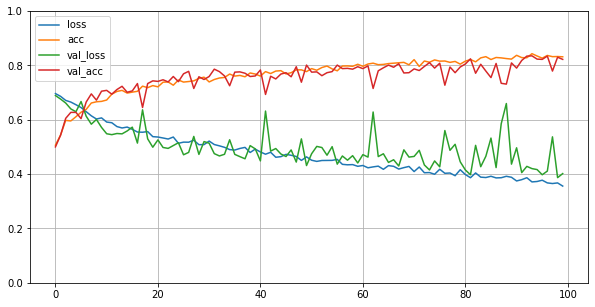

In [45]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [46]:
model.save("model_data_augmented.h5")
K.clear_session()
del model

In [72]:
model = keras.models.load_model('model_data_augmented.h5')

In [73]:
test_generator  = test_datagen.flow_from_directory(test_dr,
                              target_size = (150,150),
                              batch_size = 20,
                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [75]:
model.evaluate_generator(test_generator,steps = 50)

  ...
    to  
  ['...']


[0.41332427233457564, 0.822]

#### We can see that this model after data augmentation has performed well on both validation set and test set with an accuracy of 82% and accuracy on train set being 83%.Hence we can say that, this model aint overfitting the data and can be used further.

# VGG16 Transfer Learning


In [47]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150,150,3))

58892288/58889256 [==============================] - 21s 0us/step


In [48]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [82]:
model  = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))


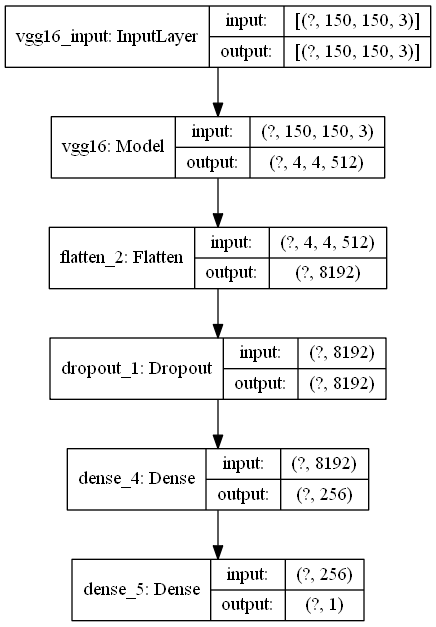

In [83]:
dot_img_file = 'model_VGG16.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [87]:
#we are setting the parameters of VGG16 model to False so that they can be skipped.
for l in conv_base.layers: 
    l.trainable=False

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [53]:
model.compile(optimizer = optimizers.RMSprop(lr=1e-5),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [54]:
#callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_model-{epoch:02d}.h5',save_best_only = True)
earlystop_cb = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [55]:
history  = model.fit_generator(train_generator,
                               steps_per_epoch = 100,
                               epochs = 30,
                               validation_data =validation_generator,
                               validation_steps = 50 ,
                              callbacks=[checkpoint_cb,earlystop_cb])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 776s 8s/step - loss: 0.5505 - acc: 0.7150 - val_loss: 0.3198 - val_acc: 0.8680
Epoch 2/30
100/100 [==============================] - 815s 8s/step - loss: 0.3186 - acc: 0.8600 - val_loss: 0.2179 - val_acc: 0.9130
Epoch 3/30
100/100 [==============================] - 802s 8s/step - loss: 0.2412 - acc: 0.9015 - val_loss: 0.1410 - val_acc: 0.9420
Epoch 4/30
100/100 [==============================] - 638s 6s/step - loss: 0.1983 - acc: 0.9170 - val_loss: 0.1784 - val_acc: 0.9390
Epoch 5/30
100/100 [==============================] - 618s 6s/step - loss: 0.1769 - acc: 0.9205 - val_loss: 0.1547 - val_acc: 0.9470
Epoch 6/30
100/100 [==============================] - 609s 6s/step - loss: 0.1548 - acc: 0.9380 - val_loss: 0.1132 - val_acc: 0.9540
Epoch 7/30
100/100 [==============================] - 605s 6s/step - loss: 0.1280 - acc: 0.9450 - val_loss: 0

<function matplotlib.pyplot.show(close=None, block=None)>

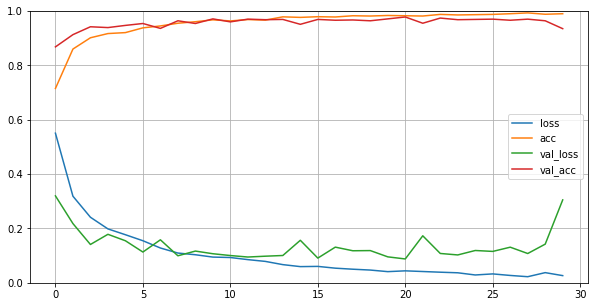

In [56]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [57]:
history_df = pd.DataFrame(history.history)

In [88]:
#saving the entire model
model.save("CNN_model_VGG16.h5")
K.clear_session()
del model

#### Importing the best model and running on test set to findout the accuracy on it

In [69]:
model_best  = keras.models.load_model('CNN_model-21.h5')

In [67]:
test_generator  = test_datagen.flow_from_directory(test_dr,
                              target_size = (150,150),
                              batch_size = 20,
                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [70]:
model_best.evaluate_generator(test_generator,steps = 50)

  ...
    to  
  ['...']


[0.11205495020723902, 0.971]

### We found out that the testset accuacy has come up to 97% from 83%(without vgg16 model)